In [107]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [108]:
# стандартизация
def std_scale(X, ddof=0):
    mean = X.mean()
    std = (sum((X - mean)**2)/(X.shape[0]-ddof))**(1/2)
    return (X - mean)/std

# нормализация
def min_max_scale(X):
    return (X - X.min())/(X.max() - X.min())

# среднеквадратичная ошибка
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [105]:
# стандартизация признаков
X_std = X.copy().astype(np.float64)
X_std[:, 1] = std_scale(X_std[:, 1])
X_std[:, 2] = std_scale(X_std[:, 2])

In [16]:
def GD_reg_L2(X, y, eta=1e-2, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for _ in range(5000):
        y_pred = X @ W
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = alpha * W
        
        W-= eta * dQ + dReg
    
    return W

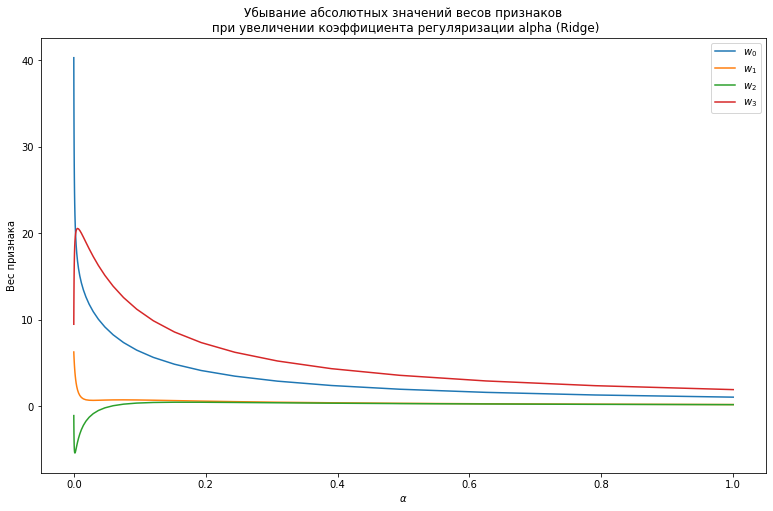

In [106]:
n = 50

alpha_list = np.logspace(-5, 0, n)
weights_list = np.zeros((n, X_std.shape[1]))

eta = 1e-2

for i, alpha in enumerate(alpha_list):
    weights_list[i, :] = GD_reg_L2(X_std, y, eta=1e-2, alpha=alpha)

fig, ax = plt.subplots()

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel(r'$\alpha$')
plt.ylabel('Вес признака')

for i in range(weights_list.shape[1]):
    ax.plot(alpha_list, weights_list[:, i], label=f'$w_{i}$')

ax.legend()

fig.set_figheight(8)
fig.set_figwidth(13)

По мере увеличения коффициента $\alpha$, веса признаков приближаются к нулевому значению

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [142]:
def GD_reg_L1(X, y, eta=1e-2, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for _ in range(5000):
        y_pred = X @ W
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = alpha * np.sign(W)
        
        W-= eta * dQ + dReg
    
    return W

### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

При нормализации, значения по признаку масштабируются относительно размаха между минимальным и максимальным значением: 
$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

Минимальное значение приравняетя нулю. Максимальное значение приравняется единице.

При стандартизации, значения по признаку масштабируются относительно среднего значения. Показывает насколько удалено значение от среднего (на сколько среднеквадратичных отклонений (сигм)):
$$x^{j}_{i}=\frac{x^{j}_{i} - (\frac{1}{l}\sum^{l}_{i=1}x^{j}_{i})}{\sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}}$$

Положение каждого значения, относительно друг друга не меняется. Т.е. технически возможно применить стандартизацию к нормализованному признаку, но в результате мы получим такие же значения, что и при стандартизации не нормализованного признака. Также произойдет при нормализации стандартизованного признака. 

Ниже примеры

In [111]:
std_scale(min_max_scale(X[:, 2])), std_scale(X[:, 2])

(array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]),
 array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]))

In [113]:
min_max_scale(std_scale(X[:, 2])), min_max_scale(X[:, 2])

(array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871]),
 array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871]))

### 4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [190]:
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot as plt

In [191]:
X, y = make_regression(n_samples=10000, n_features=2, noise=50, random_state=42)

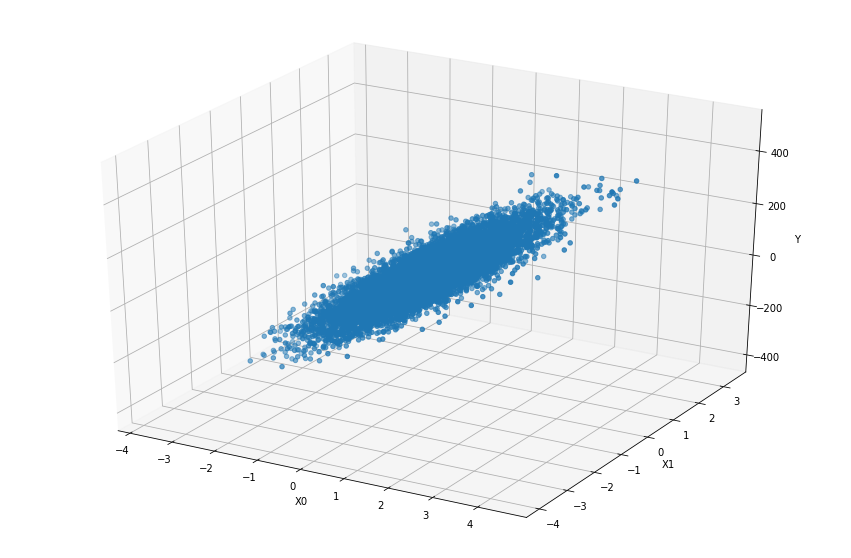

In [192]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [193]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [194]:
err_list = np.zeros((2, 500))

In [195]:
eta = 1e-2

W = np.random.randn(X.shape[1])

for i in range(500):
    y_pred = X @ W
    dQ = 2/X.shape[0] * X.T @ (y_pred - y)
    
    W -= eta * dQ
    
    err = calc_mse(y, y_pred)
    err_list[0][i] = err
    
    if i%10 == 0:
        print(f'Iteration {i}, weights: {W}, MSE = {err}')

Iteration 0, weights: [-0.17969085  2.40873511 -0.7323288 ], MSE = 12025.948001587738
Iteration 10, weights: [-0.13174231 19.81420769  0.37947836], MSE = 8881.371650440686
Iteration 20, weights: [-0.11591136 34.07556369  1.29311346], MSE = 6770.2206358160975
Iteration 30, weights: [-0.12210714 45.76078687  2.0438909 ], MSE = 5352.857325139978
Iteration 40, weights: [-0.14284596 55.33524907  2.66083362], MSE = 4401.2719099298865
Iteration 50, weights: [-0.17263686 63.18024909  3.16779358], MSE = 3762.3922729960054
Iteration 60, weights: [-0.2075045  69.60820204  3.58437291], MSE = 3333.4538330492483
Iteration 70, weights: [-0.24461955 74.87508425  3.9266809 ], MSE = 3045.4650868439244
Iteration 80, weights: [-0.28201346 79.19062971  4.20795624], MSE = 2852.1077445838855
Iteration 90, weights: [-0.31835899 82.72668427  4.4390784 ], MSE = 2722.285116952915
Iteration 100, weights: [-0.35280216 85.62405044  4.62898797], MSE = 2635.119607473331
Iteration 110, weights: [-0.384834   87.9980956

In [196]:
eta = 1e-2

batch_size = 1

W = np.random.randn(X.shape[1])

for i in range(500):
    batch_idx = np.random.randint(X.shape[0], size=batch_size)
    
    batch_X = X[batch_idx]
    batch_y = y[batch_idx]
    batch_y_pred = batch_X @ W
    
    dQ = 2/batch_size * batch_X.T @ (batch_y_pred - batch_y)
    
    W -= eta * dQ
    
    y_pred = X @ W
    err = calc_mse(y, y_pred)
    err_list[1][i] = err
    
    if i%10==0:
        print(f'Iteration {i}, Weights: {W}, MSE = {err}')

Iteration 0, Weights: [-5.62830133 15.26615307 -5.79392916], MSE = 9491.846231354824
Iteration 10, Weights: [-5.79245013 19.230231   -1.18138102], MSE = 8773.529958414143
Iteration 20, Weights: [-8.17284267 26.412446    1.31306371], MSE = 7703.425125187333
Iteration 30, Weights: [-10.06268057  40.24156267   1.5127147 ], MSE = 5948.897361149084
Iteration 40, Weights: [-5.54917005 46.3491871  -3.6173841 ], MSE = 5278.2578886779565
Iteration 50, Weights: [-7.76468392 59.43804592 -1.94124952], MSE = 4093.5265180756546
Iteration 60, Weights: [-9.3234319  64.5087959  -7.32724196], MSE = 3861.4952496259702
Iteration 70, Weights: [-6.39032655 75.14974129 -2.46228077], MSE = 3106.680249433645
Iteration 80, Weights: [-9.54108022 81.29362755 -0.86811754], MSE = 2881.3853127925304
Iteration 90, Weights: [-12.37993683  80.12844581   5.2683744 ], MSE = 2941.41851893161
Iteration 100, Weights: [-7.99277094 76.41365655  7.16842085], MSE = 3009.839550866372
Iteration 110, Weights: [-3.42438891 79.27491

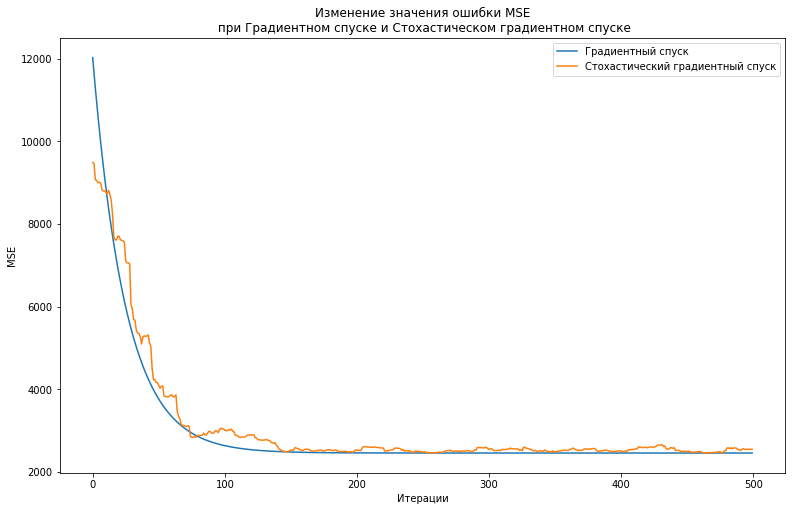

In [199]:
fig, ax = plt.subplots()

plt.title('Изменение значения ошибки MSE\n при Градиентном спуске и Стохастическом градиентном спуске')
plt.xlabel('Итерации')
plt.ylabel('MSE')


ax.plot(np.arange(err_list.shape[1]), err_list[0], label='Градиентный спуск')
ax.plot(np.arange(err_list.shape[1]), err_list[1], label='Стохастический градиентный спуск')

ax.legend()

fig.set_figheight(8)
fig.set_figwidth(13)